<h1 style="color: red;  text-align: center;">K-MEDIAS</h1>

Link: https://es.wikipedia.org/wiki/K-medias

K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método utilizado en minería de datos.

La agrupación del conjunto de datos puede ilustrarse en una partición del espacio de datos en celdas de Voronoi.

El problema es computacionalmente difícil (NP-hard). Sin embargo, hay eficientes heurísticas que se emplean comúnmente y convergen rápidamente a un óptimo local. Estos suelen ser similares a los algoritmos esperanza-maximización de mezclas de distribuciones gausianas por medio de un enfoque de refinamiento iterativo empleado por ambos algoritmos. Además, los dos algoritmos usan los centros que los grupos utilizan para modelar los datos, sin embargo k-medias tiende a encontrar grupos de extensión espacial comparable, mientras que el mecanismo expectation-maximization permite que los grupos tengan formas diferentes.

<img src="https://miro.medium.com/max/2354/1*b2sO2f--yfZiJazc5rYSpg.gif" width="400" height="400" />

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# paso 0: generar datos

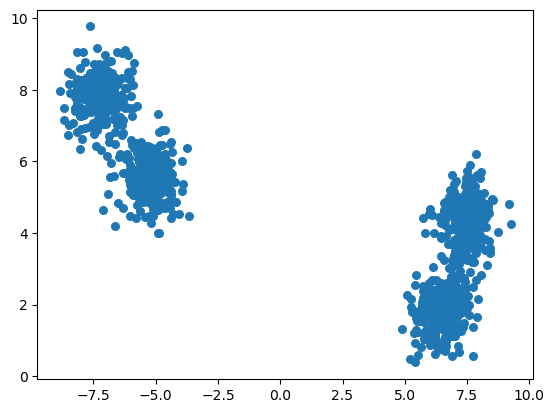

In [11]:
N = 1000
K = 4
random_seed = 4

#X, _ = make_blobs(n_samples=N, centers=K, cluster_std=0.60, random_state=random_seed)
X, _ = make_blobs(n_samples=N, centers=K, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.show()

In [13]:
# hacer que la data sea una matriz de listas para facilitar el proceso
P = [ [ float(d[0]) , float(d[1]) ] for d in X ]
print(type(P), type(P[0]), type(P[0][0]), type(P[0][1]))
print(P)

<class 'list'> <class 'list'> <class 'float'> <class 'float'>
[[-5.012261215961943, 5.003982038396938], [-5.370235702148403, 5.942374494422207], [-6.60306465763272, 8.336999678747821], [5.959138457636454, 2.068726099358951], [-5.549423390246324, 5.695109222762814], [-7.266844554176151, 8.740585593533531], [7.183128583524122, 2.75923986210499], [8.075350634209407, 4.20777157098216], [7.189622914318198, 3.6133845644677187], [-7.006693872983141, 8.327018499264385], [-4.378449349001742, 5.953840830029178], [6.103807367697836, 1.431924199246493], [-4.857346081764046, 5.323507224937513], [6.906195752609843, 1.514077786760961], [-4.81617427629356, 4.801698581954833], [7.183406447718636, 4.306321073764625], [7.896475367084899, 1.657842149462079], [-5.148194500691554, 4.479399921540271], [7.880258139800969, 3.923219566778447], [-7.358705038393085, 7.403881035786677], [-5.228876213271444, 5.467119675316196], [-4.530842446028069, 4.843186627847191], [-7.612536712142488, 8.382540259934137], [-7.97

# paso 1: generar centoides

In [16]:
# para mayor consistencia , se selecciona los centroides de los puntos originales
def generar_centroides(k,puntos):
    return random.sample(puntos,k)

# paso 2: calcular distancias

In [19]:
def distancias(centroides, puntos):
    distancia_matriz = []
    for punto in puntos:
        distances = [((punto[0] - centroide[0]) ** 2 + (punto[1] - centroide[1]) ** 2) ** 0.5 for centroide in centroides]
        distancia_matriz.append(distances)
    return distancia_matriz

# paso 3: agrupar centoides con puntos

In [22]:
def obtener_asignaciones(D):
    labels = np.argmin(D, axis=1)
    return labels.tolist()  

# paso 4: actualizar centroides

In [25]:
import numpy as np

def calcular_nuevos_centroides(puntos, asignaciones):
    asignaciones_numpy = np.array(asignaciones)
    puntos = np.array(puntos)
    etiquetas = np.unique(asignaciones_numpy)
    nuevos_centroides = []

    for etiqueta in etiquetas:
        puntos_del_grupo = puntos[asignaciones_numpy == etiqueta]  
        if len(puntos_del_grupo) > 0:
            nuevo_centroide = np.mean(puntos_del_grupo, axis=0)  
        else:
            # Si no hay puntos asignados, asignamos un centroide arbitrario (por ejemplo, un vector de ceros)
            # O puedes elegir otro valor que tenga sentido en tu caso.
            nuevo_centroide = np.zeros(puntos.shape[1])  # Un centroide arbitrario en el espacio de dimensión 'd'

        nuevos_centroides.append(nuevo_centroide)  # Agregar el nuevo centroide

    return np.array(nuevos_centroides)  # Convertir la lista en un array de NumPy antes de devolver


# paso 5: evaluar si existen cambios en las asignaciones

In [28]:
import hashlib

def calcular_hash(asignaciones):
    data = str(asignaciones).encode()
    hash_obj = hashlib.sha256(data)
    hash_value = hash_obj.hexdigest()
    return hash_value

# paso 6: calcular el error

In [31]:
def calcular_error(puntos, centroides, asignaciones):
    error_total = 0

    # Asegúrate de que las asignaciones sean una lista de enteros
    asignaciones = [int(a[0]) if isinstance(a, (list, np.ndarray)) else int(a) for a in asignaciones]

    # Encuentra las asignaciones únicas
    asignaciones_unicas = set(asignaciones)

    for asignacion in asignaciones_unicas:
        error_asignacion = 0
        for i in range(len(puntos)):
            if asignacion == asignaciones[i]:
                # Extrae las coordenadas del punto y del centroide
                px, py = puntos[i]
                cx, cy = centroides[asignacion]

                # Calcula el error cuadrático
                error_asignacion += (px - cx) ** 2 + (py - cy) ** 2

        error_total += error_asignacion
    return error_total


# Imprimir cada K grupo

In [34]:
def graficar_solucion(puntos, asignaciones, centroides, error):
    # Extraer las coordenadas X y Y de los puntos
    x_test = [p[0] for p in puntos]
    y_test = [p[1] for p in puntos]
    
    # Obtener los valores únicos de asignaciones
    asignaciones_unicas = set(asignaciones)
    
    # Definir una lista de colores para asignar a cada grupo
    colores = [
        'r', 'g', 'b', 'y', 'c', 'm',  # Rojo, verde, azul, amarillo, cian, magenta
        'k', 'w',                      # Negro, blanco
        'orange', 'purple', 'pink',    # Naranja, púrpura, rosa
        'brown', 'gray', 'lime',       # Marrón, gris, verde lima
        'olive', 'navy', 'teal',       # Oliva, azul marino, verde azulado
        'gold', 'silver', 'maroon',    # Dorado, plateado, marrón oscuro
        'indigo', 'turquoise', 'plum', # Índigo, turquesa, ciruela
        'skyblue', 'violet', 'khaki'   # Azul cielo, violeta, caqui
    ]

    
    # Graficar los puntos para cada asignación
    for idx, asignacion in enumerate(asignaciones_unicas):
        valores_x = [x_test[i] for i in range(len(x_test)) if asignaciones[i] == asignacion]
        valores_y = [y_test[i] for i in range(len(y_test)) if asignaciones[i] == asignacion]
        
        # Usar el color correspondiente de la lista 'colores'
        plt.scatter(valores_x, valores_y, label=f'Grupo {asignacion}', color=colores[idx])
        plt.scatter(centroides[asignacion][0], centroides[asignacion][1], color='gold', s=200, marker='*', edgecolor='black')
    
    # Etiquetas y leyenda
    plt.title(f"K={len(centroides)}, Error: {error}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

# ALGORITMO

In [37]:
# K: cantidad de grupos, 
# P: matriz de puntos x,y
def kmeans(K,P):

    iteraciones = 0

    # paso 1: obtener centroides
    C = generar_centroides(K,P)

    old_hash = None

    # iteraciones
    while True:
    
        # paso 2: calcular distancias
        D = distancias(C,P)

        # paso 3: obtener agrupaciones de puntos con centroides
        A = obtener_asignaciones(D)
        
        # paso 4: obtener nuevos centroides
        C = calcular_nuevos_centroides(P,A)  

        # paso 5: existen cambios en las asignaciones de puntos con centroides ?
        new_hash = calcular_hash( A )
        if old_hash == new_hash:
            break
        else:
            old_hash = new_hash

        iteraciones += 1

    # paso 6: calcular error y retornar asignaciones y error
    error = calcular_error(P,C,A)
    return A, C, error

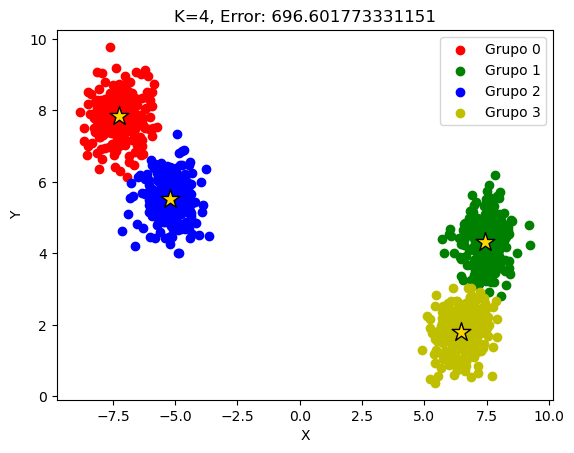

In [39]:
klusters = 4
asignaciones, centroides, error = kmeans( klusters, P)
graficar_solucion(P, asignaciones, centroides, error)

# Obtener el mejor K

In [41]:
rangos_de_clusters = range(1, 11)
models = []

for K in rangos_de_clusters:
    min_error = float('inf')  # Inicializamos con infinito
    best_model = None         # Para almacenar el mejor modelo para este K
    
    for _ in range(5):  # Repetimos 5 veces
        asignaciones, centroides, error = kmeans(K, P)
        
        if error < min_error:  # Comparamos errores
            min_error = error
            best_model = [asignaciones, centroides, error]
    
    models.append(best_model)  # Guardamos el mejor modelo para este K


Text(0, 0.5, 'error')

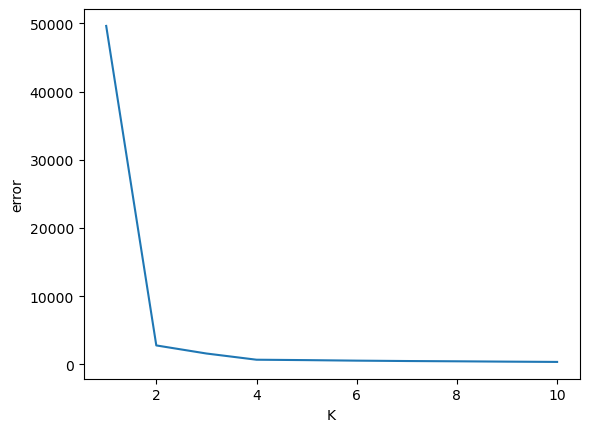

In [43]:
errors = [model[2] for model in models]

plt.plot(range(1,len(errors)+1),errors)
plt.xlabel("K")
plt.ylabel("error")

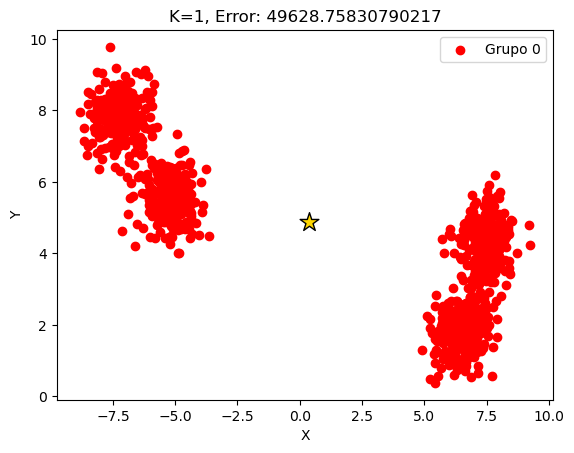

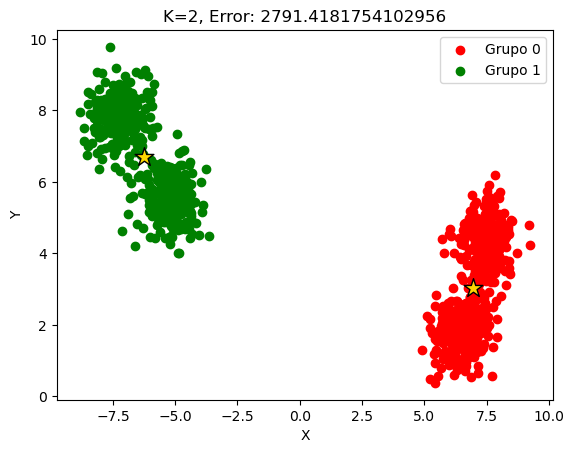

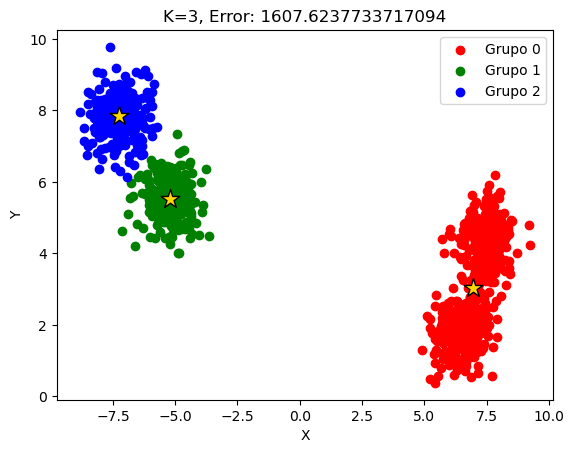

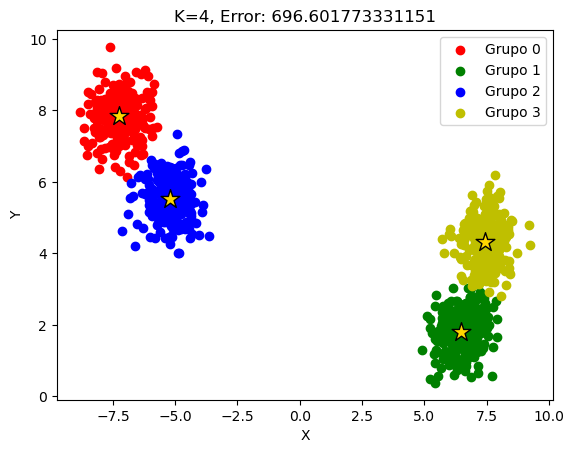

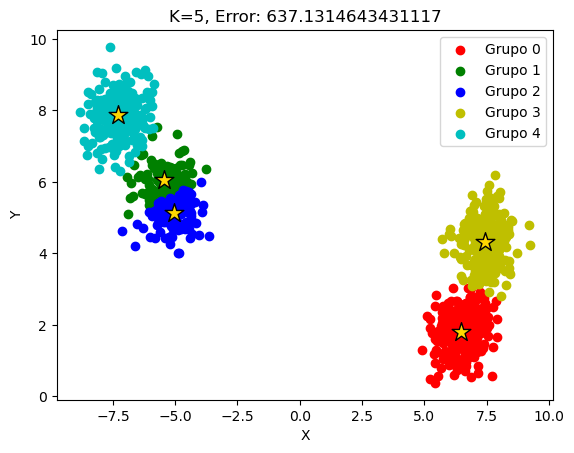

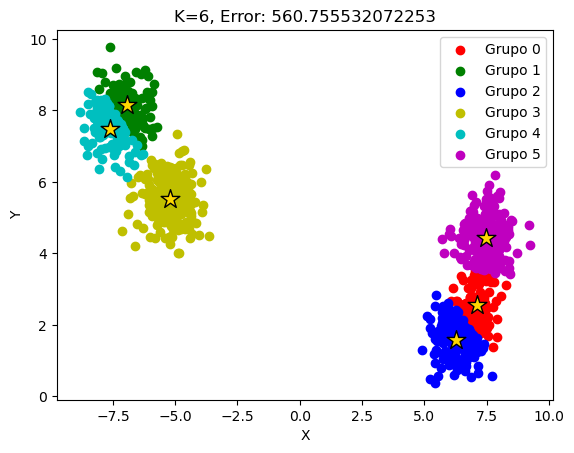

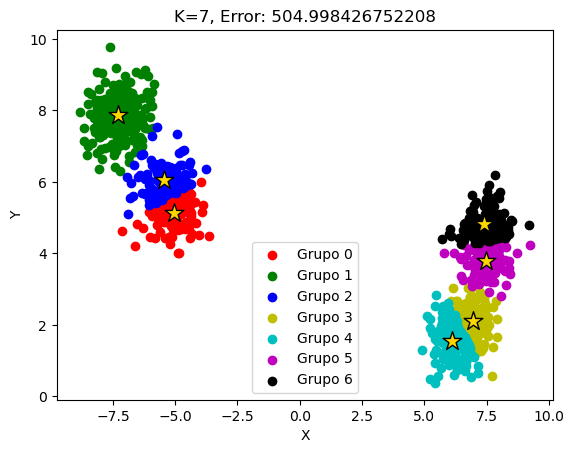

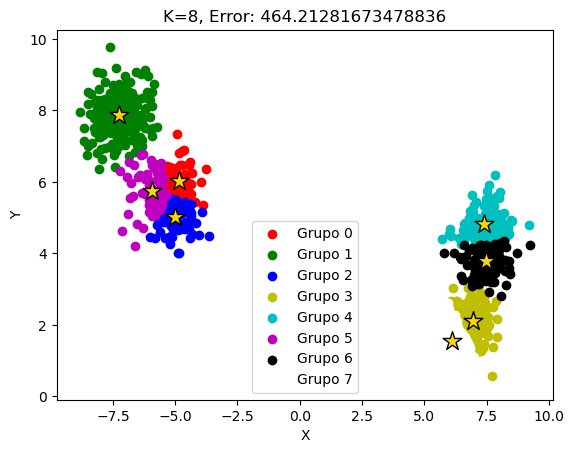

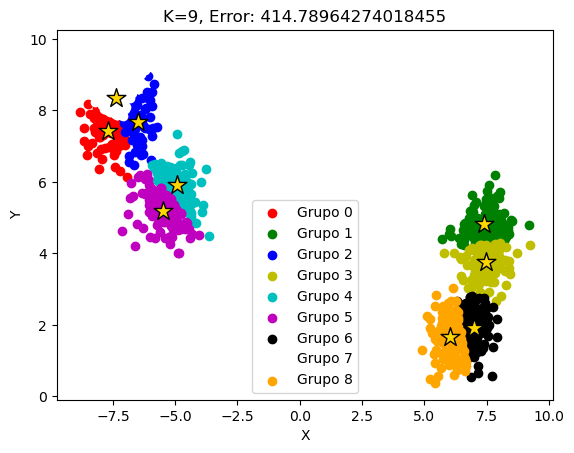

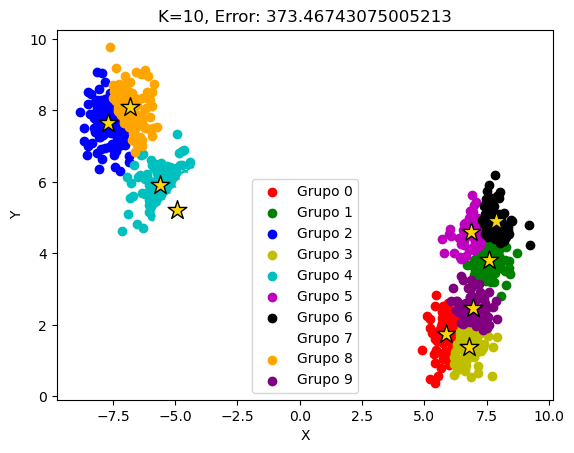

In [44]:
for model in models:
    asignaciones = model[0]
    centroides = model[1]
    error = model[2]
    graficar_solucion(P, asignaciones, centroides, error)

In [81]:
asignaciones = models[5][0]

asignaciones_unicas = set(asignaciones)

agrupaciones = {}

for asignacion in asignaciones_unicas:
    for punto in P:
        if asignacion in agrupaciones:
            agrupaciones[asignacion].append( punto )
        else:
            agrupaciones[asignacion] = [punto]

print(asignaciones)

[3, 3, 1, 2, 3, 1, 0, 5, 5, 1, 3, 2, 3, 2, 3, 5, 0, 3, 5, 4, 3, 3, 1, 4, 3, 1, 2, 3, 3, 2, 5, 0, 3, 5, 3, 0, 1, 5, 2, 2, 5, 3, 4, 1, 4, 5, 4, 1, 5, 4, 5, 3, 2, 3, 3, 5, 5, 5, 3, 5, 3, 3, 1, 2, 3, 0, 0, 2, 5, 3, 4, 3, 2, 2, 3, 1, 1, 5, 3, 5, 1, 0, 3, 3, 3, 4, 0, 0, 3, 5, 3, 3, 1, 1, 2, 3, 0, 3, 4, 3, 2, 3, 2, 4, 5, 1, 4, 2, 0, 0, 4, 3, 4, 5, 2, 5, 5, 0, 2, 3, 5, 2, 4, 2, 1, 3, 2, 5, 1, 2, 0, 5, 3, 1, 3, 5, 5, 0, 5, 1, 3, 5, 4, 2, 1, 3, 3, 5, 4, 3, 5, 2, 3, 4, 1, 2, 5, 3, 5, 2, 2, 1, 0, 5, 5, 4, 2, 5, 5, 5, 5, 1, 4, 2, 1, 4, 5, 3, 5, 4, 5, 2, 3, 3, 2, 0, 2, 4, 3, 4, 5, 3, 5, 1, 5, 2, 5, 2, 3, 3, 1, 5, 4, 1, 2, 5, 1, 2, 2, 1, 3, 2, 5, 2, 2, 1, 0, 5, 0, 1, 5, 0, 0, 1, 2, 3, 2, 3, 3, 3, 1, 0, 3, 2, 5, 2, 4, 0, 5, 3, 5, 4, 5, 4, 2, 3, 3, 0, 3, 5, 3, 5, 3, 2, 0, 3, 1, 2, 3, 2, 3, 3, 1, 4, 1, 2, 0, 1, 5, 4, 0, 2, 5, 2, 4, 0, 1, 1, 3, 3, 1, 2, 4, 5, 0, 3, 4, 3, 0, 3, 4, 4, 3, 1, 0, 1, 5, 4, 3, 4, 2, 3, 5, 5, 5, 1, 5, 5, 3, 0, 3, 0, 5, 1, 2, 5, 1, 4, 1, 5, 3, 5, 5, 4, 3, 1, 4, 3, 0, 4, 2, 3, 3, 

In [79]:
kluster = 4
print( len( agrupaciones[kluster] ) )
print(agrupaciones[kluster])

1000
[[-5.012261215961943, 5.003982038396938], [-5.370235702148403, 5.942374494422207], [-6.60306465763272, 8.336999678747821], [5.959138457636454, 2.068726099358951], [-5.549423390246324, 5.695109222762814], [-7.266844554176151, 8.740585593533531], [7.183128583524122, 2.75923986210499], [8.075350634209407, 4.20777157098216], [7.189622914318198, 3.6133845644677187], [-7.006693872983141, 8.327018499264385], [-4.378449349001742, 5.953840830029178], [6.103807367697836, 1.431924199246493], [-4.857346081764046, 5.323507224937513], [6.906195752609843, 1.514077786760961], [-4.81617427629356, 4.801698581954833], [7.183406447718636, 4.306321073764625], [7.896475367084899, 1.657842149462079], [-5.148194500691554, 4.479399921540271], [7.880258139800969, 3.923219566778447], [-7.358705038393085, 7.403881035786677], [-5.228876213271444, 5.467119675316196], [-4.530842446028069, 4.843186627847191], [-7.612536712142488, 8.382540259934137], [-7.977350860934891, 6.914330313227494], [-5.284093534694031, 5